In [3]:
import numpy as np
import pandas as pd
# For visualization
import matplotlib.pyplot as plt

In [4]:
# Load and preprocess a dataset

In [11]:
# Sample dataset: Spam detection
data = {
    'word_free': [3, 1, 0, 5, 0, 2, 1, 4, 0, 1],
    'word_lottery': [0, 1, 2, 0, 5, 1, 0, 2, 4, 3],
    'word_discount': [1, 0, 3, 2, 1, 0, 2, 1, 5, 4],
    'is_spam': [1, 0, 1, 1, 0, 0, 0, 1, 1, 1]  # 1 = spam, 0 = not spam
}

df = pd.DataFrame(data)
# print(df)
# Split dataset into X (features) and y (labels)
X = df[['word_free', 'word_lottery', 'word_discount']].values  # Features (inputs)
y = df['is_spam'].values.reshape(-1, 1)  # Labels (outputs), reshaped to column vector
# print(df[['word_free', 'word_lottery', 'word_discount']])
# print(X)
# print(df['is_spam'])
# print(df['is_spam'].values)
# print(y)
# Get number of samples and features
m, n = X.shape  # m = number of samples, n = number of features
# print(m,n)

In [13]:
# Initialize Parameters

In [15]:
def initialize_parameters(n):
    w = np.zeros((n, 1))  # Column vector of shape (n,1)
    b = 0
    return w, b

# Initialize parameters themselves
w, b = initialize_parameters(n)

In [16]:
# Implement Sigmoid Function

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [18]:
# Compute Cost Function (Log Loss)

In [19]:
def compute_cost(X, y, w, b):
    m = X.shape[0]  # Number of training samples
    z = np.dot(X, w) + b  # Linear function: z = Xw + b
    y_hat = sigmoid(z)  # Apply sigmoid function
    loss = - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))  # Binary cross-entropy
    cost = np.sum(loss) / m  # Average cost
    return cost

In [21]:
def compute_cost(X, y, w, b):
    m = X.shape[0]  # Number of training samples
    z = np.dot(X, w) + b  # Linear function: z = Xw + b
    y_hat = sigmoid(z)  # Apply sigmoid function
    loss = - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))  # Binary cross-entropy
    cost = np.sum(loss) / m  # Average cost
    return cost

In [22]:
# Compute Gradients for Gradient Descent

In [23]:
def compute_gradients(X, y, w, b):
    m = X.shape[0]  # Number of training samples
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    
    dw = (1/m) * np.dot(X.T, (y_hat - y))  # Gradient of w
    db = (1/m) * np.sum(y_hat - y)  # Gradient of b
    
    return dw, db

In [24]:
# Train the Model Using Gradient Descent

In [25]:
def train(X, y, w, b, learning_rate=0.01, epochs=1000):
    costs = []
    
    for i in range(epochs):
        # Compute cost and gradients
        cost = compute_cost(X, y, w, b)
        dw, db = compute_gradients(X, y, w, b)
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Store cost for plotting
        if i % 100 == 0:
            costs.append(cost)
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return w, b, costs

# Train model
w, b, costs = train(X, y, w, b, learning_rate=0.1, epochs=1000)


Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.3784
Iteration 200: Cost = 0.3244
Iteration 300: Cost = 0.2873
Iteration 400: Cost = 0.2602
Iteration 500: Cost = 0.2398
Iteration 600: Cost = 0.2238
Iteration 700: Cost = 0.2109
Iteration 800: Cost = 0.2003
Iteration 900: Cost = 0.1913


In [29]:
# Make Predictions

In [30]:
def predict(X, w, b):
    y_hat = sigmoid(np.dot(X, w) + b)  # Compute probability
    return (y_hat >= 0.5).astype(int)  # Convert probability to 0 or 1

# Test predictions
y_pred = predict(X, w, b)
print("Predictions:", y_pred.flatten())

# Calculate accuracy
accuracy = np.mean(y_pred == y) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Predictions: [1 0 1 1 0 0 1 1 1 1]
Model Accuracy: 90.00%


In [31]:
# Plot the Cost Function Over Iterations

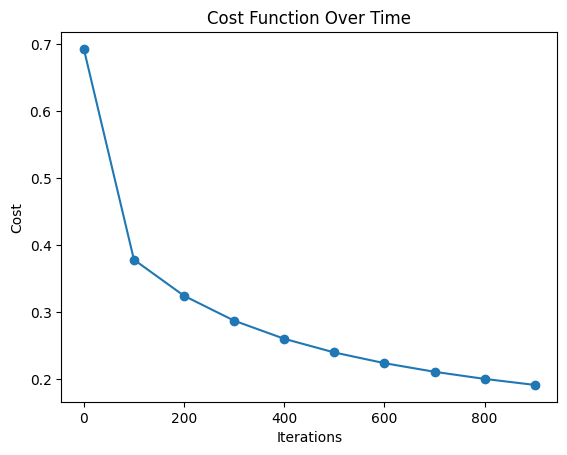

In [33]:
plt.plot(range(0, 1000, 100), costs, marker='o', linestyle='-')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Time")
plt.show()